# CHURN CUSTOMER ANALYSIS

# A. CONTEXT

The leading telecom company has a massive market sharebut one big problem: several rivalsthat are constantly trying to steal customers.  Becausethis company has been the marketleader for so many years, there are not significant opportunities to grow with new customers. Instead, company executives have decided to focuson their churn: the rate at which they lose customers.

They have two teams especially interested in thisdata: the marketing team and the customer service team.  Each team has its own reason for wantingthe analysis. The marketing teamwants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.
They decide to hire you for two tasks:

    1. Help them identify the types of customers who churn
    2. Predict who of their current customers will churnnext month.To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn columnwill say Yes if the customer churned in the past month.The data also offers demographic dataand data on the services that each customer purchases.Finally there is information on thepayments those customers make.
    
## Deliverables
Tell a story to themarketing team to help them understand the customerswho churn and what the marketingteam can do to prevent it. Highlight the informationwith helpful visualizations.

    1.How much is churn affecting the business? How bigis churn compared to the existingcustomer base?
    2.Explain churn by the below categories. Are there anyfactors that combine to beespecially impactful
    
        a.Customer demographics like age and gender
        b.Services used
        c.Billing information
    3.What services are typically purchased by customerswho churned? Are any services 
    especially helpful in retaining customers?
    4.Bonus!How long will it take for the company to loseall its customers?  Which demographics will they lose first?
bold text

# EXPLORATORY DATA ANALYSIS (EDA)





# 1 - PACKAGES AND DATA IMPORT

## 1.1 - Packages

In [ ]:
# Packages for data manipulation

import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for machine learning

## 1.2 - Reading Data

In [ ]:
# import and read the file from a local host
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn BA Project/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# display the head of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2 - DATA CLEANING

##2.1 Data Checking

In [ ]:
# shape of the dataset
df.shape

(7043, 21)

In [ ]:
# columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# display the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# verify there are no duplicated values
df.customerID.nunique()

7043

In [ ]:
# count unique column values
col_dicts ={}
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6531
Churn = 2


In [ ]:
# display values of categorical columns
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.SeniorCitizen.unique()

array([0, 1])

In [ ]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
# display values of tenure columns
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [ ]:
# categorical function for tenure columns
def tenure_cat(x, errors = "coerce"):
  if x <= 12:
    return '-12 month'
  if 13 < x <= 24:
    return '13-24 month'
  if 25 < x <= 36:
    return '25-36 month'
  if 37 < x <= 48:
    return '37-48 month'
  if x > 48:
    return '+48 month'

In [ ]:
# apply the tenure function
df['ten_group']=df['tenure'].apply(tenure_cat)
df['ten_group'].head()

0      -12 month
1    25-36 month
2      -12 month
3    37-48 month
4      -12 month
Name: ten_group, dtype: object

In [ ]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
# convert to TotalCharges to numerical type
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors = "coerce")

In [ ]:
for col in df.iloc[:,1:].columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')


In [ ]:
# phone service, internet service, online security, online backup, deviceprotection,
#tech support, streaming tv, streming movies, contract, monthly charge, total charge
# papeerless billing, monthly charges, total charges.

In [ ]:
# make changes in a new column

#save old values in a new columns
df["internet service type"] = df.InternetService

#change the new column in a dichotomic variable: Yes: they use internet services. No: they dont
dic = {'No internet service': 'No', 'No phone service': 'No', 'DSL':'Yes', 'Fiber optic': 'Yes'}
df.InternetService.replace(dic, inplace=True)

# make changes in some columns

df["PhoneService"] = df["PhoneService"].replace({1:'Yes', 0:'No'})
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:'Yes', 0:'No'})

In [ ]:
# count column values
col_dictio ={}
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 2
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6530
Churn = 2
ten_group = 5
internet service type = 3


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ten_group',
       'internet service type'],
      dtype='object')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-12 month,DSL
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 month,DSL
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-12 month,DSL
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 month,DSL
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-12 month,Fiber optic


In [ ]:
# Creating list utilities...
service = ['customerID', 'TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','PhoneService', 'MultipleLines','StreamingTV', 'StreamingMovies', 'Churn', 'InternetService'] 
customer=['customerID', 'SeniorCitizen','gender', 'Partner', 'Dependents','tenure','ten_group','PaymentMethod', 'Contract','Churn']
billing=['customerID','MonthlyCharges','TotalCharges','Churn']

In [ ]:
# Creating list utilities...
cosservice = ['SeniorCitizen', 'TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','PhoneService', 'MultipleLines',
          'StreamingTV', 'StreamingMovies', "InternetService"]
customerchar=['SeniorCitizen','gender', 'Partner', 'Dependents','ten_group','PaymentMethod', 'Contract']
billingcharges=['MonthlyCharges','TotalCharges']

In [ ]:
# service subset
df[service].head()

,customerID,TechSupport,OnlineSecurity,OnlineBackup,DeviceProtection,PhoneService,MultipleLines,StreamingTV,StreamingMovies,Churn,InternetService
0,7590-VHVEG,No,No,Yes,No,No,No phone service,No,No,No,Yes
1,5575-GNVDE,No,Yes,No,Yes,Yes,No,No,No,No,Yes
2,3668-QPYBK,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
3,7795-CFOCW,Yes,Yes,No,Yes,No,No phone service,No,No,No,Yes
4,9237-HQITU,No,No,No,No,Yes,No,No,No,Yes,Yes


In [ ]:
# customer subset
df[customer].tail()

,customerID,SeniorCitizen,gender,Partner,Dependents,tenure,ten_group,PaymentMethod,Contract,Churn
7038,6840-RESVB,No,Male,Yes,Yes,24,13-24 month,Mailed check,One year,No
7039,2234-XADUH,No,Female,Yes,Yes,72,+48 month,Credit card (automatic),One year,No
7040,4801-JZAZL,No,Female,Yes,Yes,11,-12 month,Electronic check,Month-to-month,No
7041,8361-LTMKD,Yes,Male,Yes,No,4,-12 month,Mailed check,Month-to-month,Yes
7042,3186-AJIEK,No,Male,No,No,66,+48 month,Bank transfer (automatic),Two year,No


In [ ]:
# billing subset
df[billing].head()

,customerID,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,29.85,29.85,No
1,5575-GNVDE,56.95,1889.50,No
2,3668-QPYBK,53.85,108.15,Yes
3,7795-CFOCW,42.30,1840.75,No
4,9237-HQITU,70.70,151.65,Yes


# 3-DESCRIPTIVE ANALYSIS

# 3.1-Descriptive Analysis of Services

In [ ]:
def custo(x):
    """
    This function is created in order to make univariate analysis
    It creates barblot to show distribution of customer from a frequenies table

    """
    # Frequences table
    custo = pd.DataFrame(df.groupby(x)[['customerID']].count())

    ax1 = plt.figure(figsize=(10,8))
    plt.bar(custo.index, custo['customerID'] ,color = ['coral','grey','red'], edgecolor="black")
    plt.title('Distribution of customers by '+ x,size=12)

    # Show the proportions
    for i in range(len(custo['customerID'])):
      plt.text(i,0.1, str(round(custo['customerID'].values[i]/df.shape[0], 2))+"%", fontsize =12, horizontalalignment='center', verticalalignment='baseline')
    
    #Save the graph
    plt.savefig('Distribution of customers by '+ x + ".png")
    return custo

,customerID
SeniorCitizen,
No,5901
Yes,1142


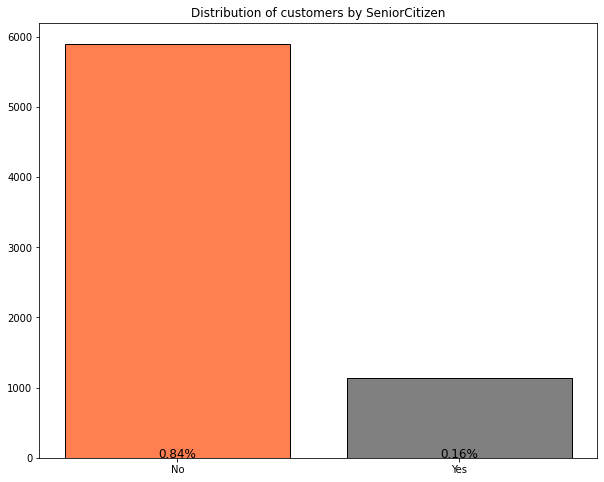

In [ ]:
custo('SeniorCitizen')

,customerID
StreamingMovies,
No,2785
No internet service,1526
Yes,2732


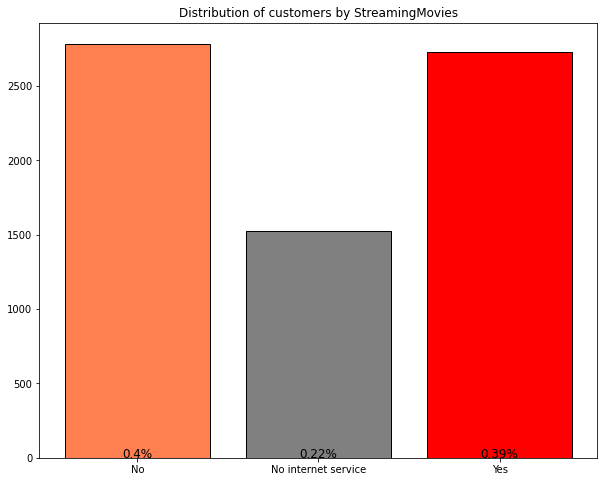

In [ ]:
custo('StreamingMovies')

,customerID
TechSupport,
No,3473
No internet service,1526
Yes,2044


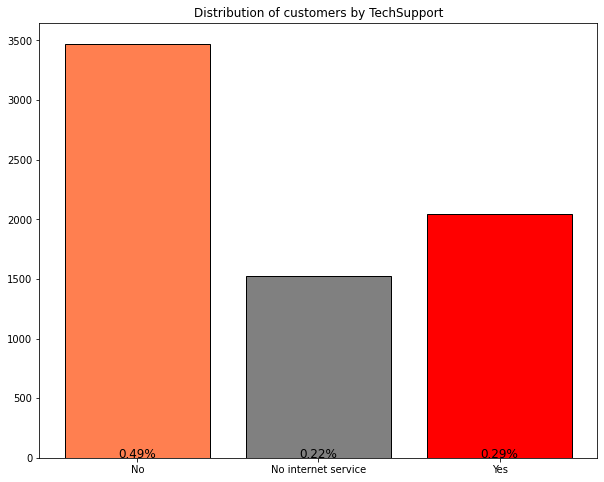

In [ ]:
custo('TechSupport')

,customerID
OnlineSecurity,
No,3498
No internet service,1526
Yes,2019


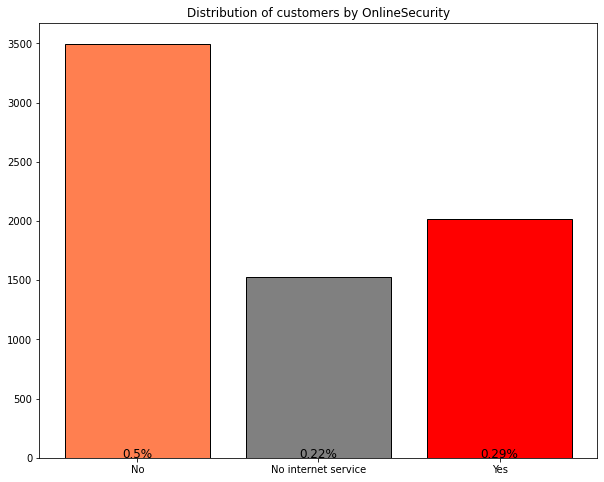

In [ ]:
custo('OnlineSecurity')

,customerID
MultipleLines,
No,3390
No phone service,682
Yes,2971


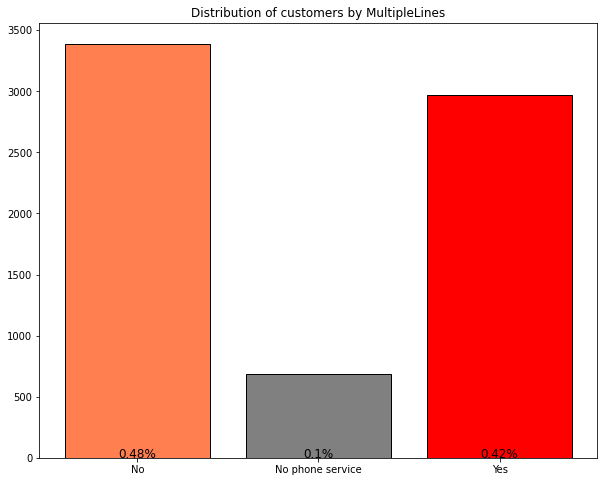

In [ ]:
custo( 'MultipleLines')

,customerID
PhoneService,
No,682
Yes,6361


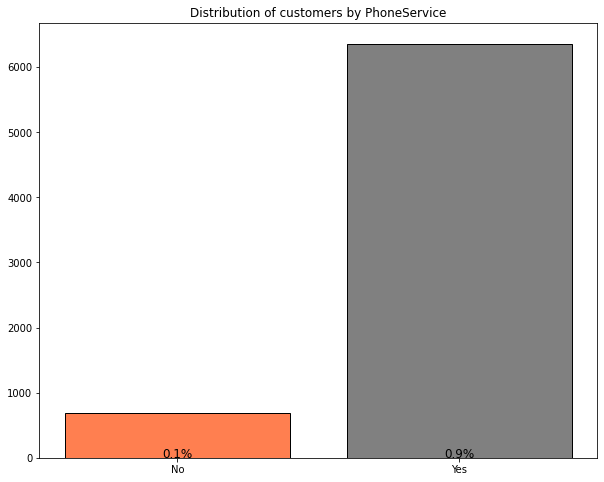

In [ ]:
custo('PhoneService')

,customerID
OnlineBackup,
No,3088
No internet service,1526
Yes,2429


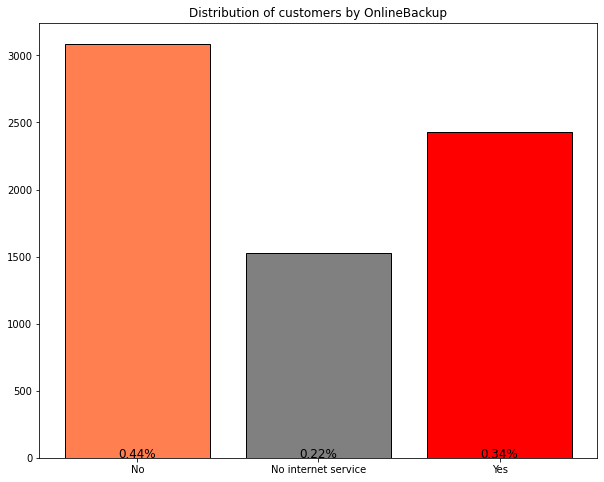

In [ ]:
custo('OnlineBackup')

,customerID
DeviceProtection,
No,3095
No internet service,1526
Yes,2422


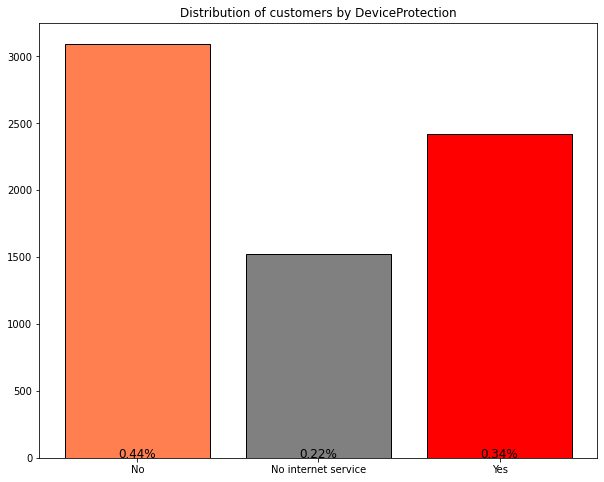

In [ ]:
custo('DeviceProtection')

# 3.2-Descriptive Analysis of Customer's characteristics

        customerID
gender            
Female        3488
Male          3555


,customerID
gender,
Female,3488
Male,3555


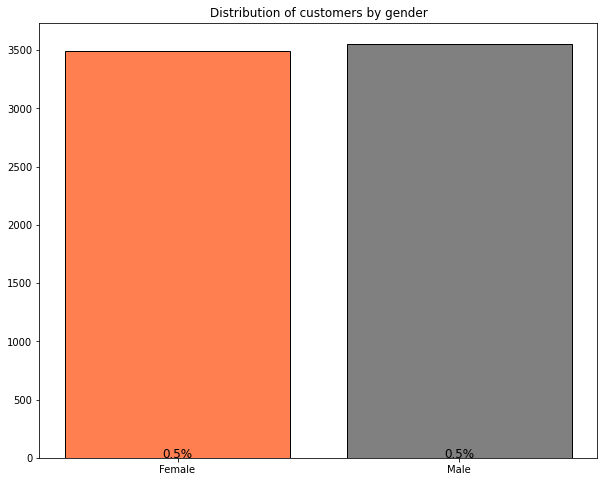

In [ ]:
custo('gender')


,customerID
SeniorCitizen,
No,5901
Yes,1142


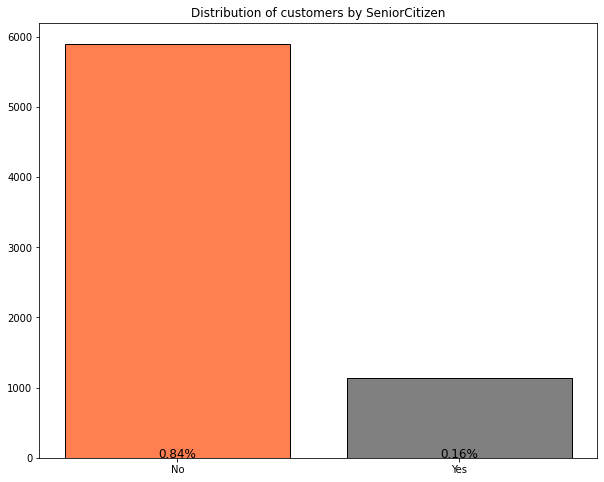

In [ ]:
custo('SeniorCitizen')

,customerID
Contract,
Month-to-month,3875
One year,1473
Two year,1695


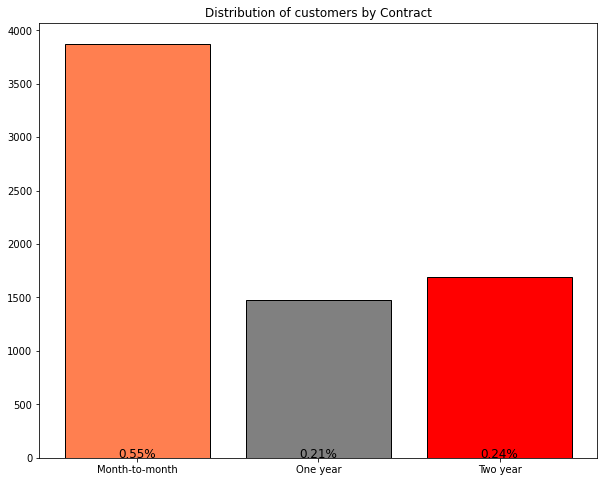

In [ ]:
custo('Contract')

,customerID
PaymentMethod,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


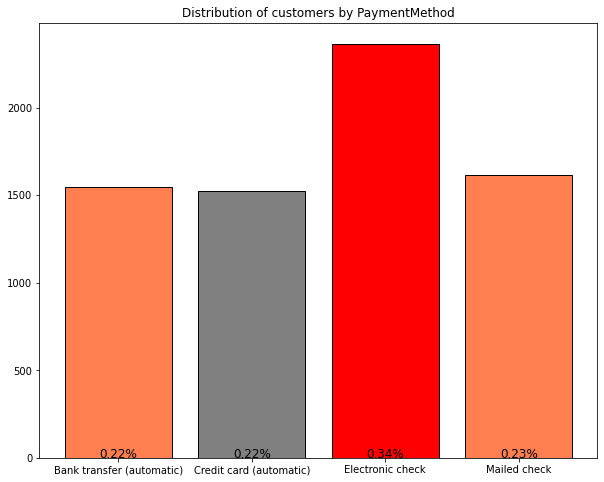

In [ ]:
custo('PaymentMethod')

,customerID
ten_group,
+48 month,2239
-12 month,2186
13-24 month,915
25-36 month,753
37-48 month,697


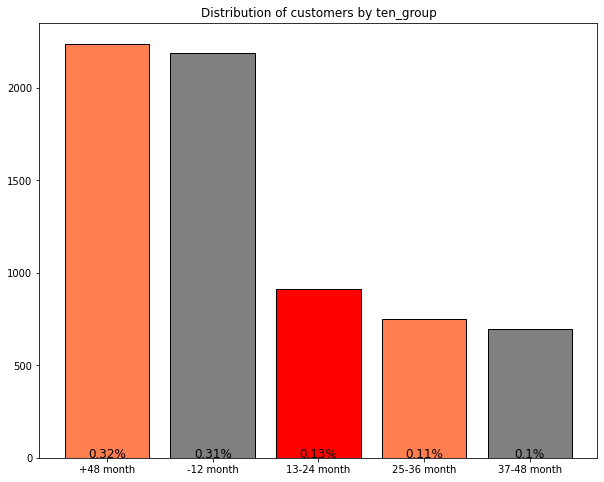

In [ ]:
custo('ten_group')

,customerID
Partner,
No,3641
Yes,3402


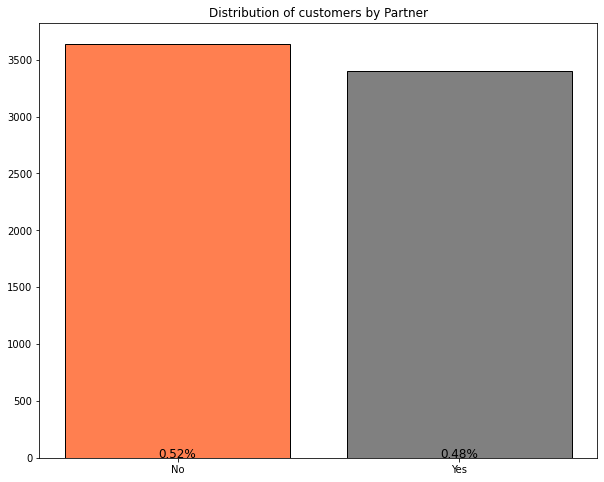

In [ ]:
custo('Partner')

,customerID
Dependents,
No,4933
Yes,2110


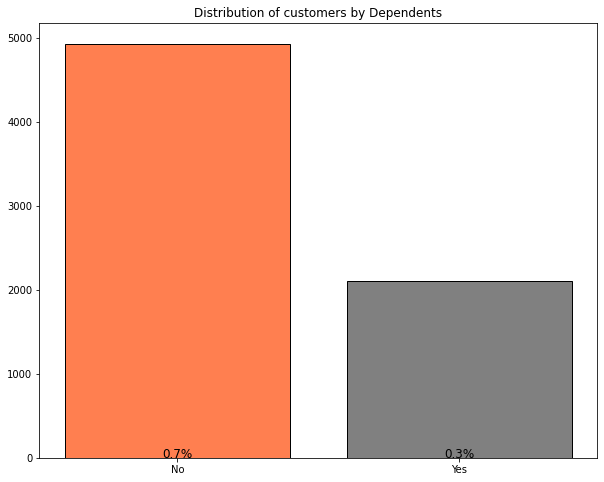

In [ ]:
custo('Dependents')

# B. IMPACT OF CHURN CUSTOMER ON BUSINESS

# 1-BIVARIATE ANALYSIS

## 1.1-How much is churn affecting the business

In [ ]:
#Table with total and monthly charges calculated for customer that move out and those who dont

churn_by_billing=df[billing].groupby(['Churn']).sum('MonthlyCharges').reset_index()
display(churn_by_billing)

,Churn,MonthlyCharges,TotalCharges
0,No,316985.75,13193241.8
1,Yes,139130.85,2862926.9


In [ ]:
churn_by_billing.at[1, 'TotalCharges']

2862926.8999999985

## 1.2-How much is churn affecting customer base  

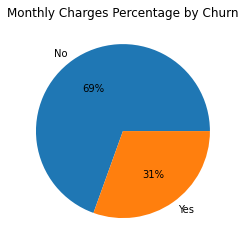

In [ ]:
#Pie chart for monthly charges 

plt.pie(churn_by_billing['MonthlyCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Monthly Charges Percentage by Churn")
plt.savefig("Monthly Charges Percentage by Churn.png")
plt.show()

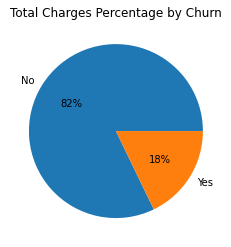

In [ ]:
#Pie for total charge

plt.pie(churn_by_billing['TotalCharges'], labels=churn_by_billing.Churn, autopct='%.0f%%')
plt.title("Total Charges Percentage by Churn")
plt.savefig("Total Charges Percentage by Churn.png")
plt.show()

In [ ]:
# create a df for the customer who move out

mon=df['Churn']=='Yes'
yes = df[mon]
yes.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
7021,1699-HPSBG,Male,No,No,No,12,Yes,No,Yes,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,-12 month,DSL
7026,8775-CEBBJ,Female,No,No,No,9,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,-12 month,DSL
7032,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,-12 month,Fiber optic
7034,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,+48 month,Fiber optic
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,-12 month,Fiber optic




Distribution of Churn by SeniorCitizen


Churn,No,Yes
SeniorCitizen,,
No,0.64,0.20
Yes,0.09,0.07




Distribution of Churn by gender


Churn,No,Yes
gender,,
Female,0.36,0.13
Male,0.37,0.13




Distribution of Churn by Partner


Churn,No,Yes
Partner,,
No,0.35,0.17
Yes,0.39,0.09




Distribution of Churn by Dependents


Churn,No,Yes
Dependents,,
No,0.48,0.22
Yes,0.25,0.05




Distribution of Churn by ten_group


Churn,No,Yes
ten_group,,
+48 month,0.30,0.03
-12 month,0.17,0.15
13-24 month,0.10,0.04
25-36 month,0.09,0.02
37-48 month,0.08,0.02




Distribution of Churn by PaymentMethod


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.18,0.04
Credit card (automatic),0.18,0.03
Electronic check,0.18,0.15
Mailed check,0.19,0.04




Distribution of Churn by Contract


Churn,No,Yes
Contract,,
Month-to-month,0.32,0.23
One year,0.19,0.02
Two year,0.23,0.01


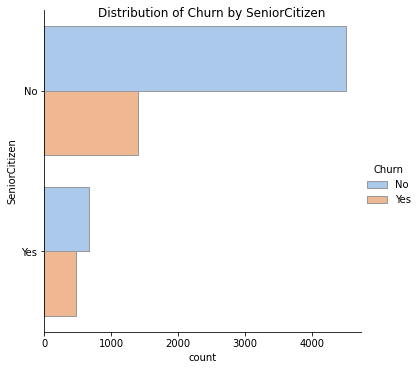

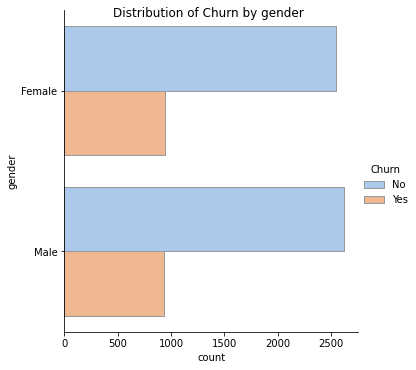

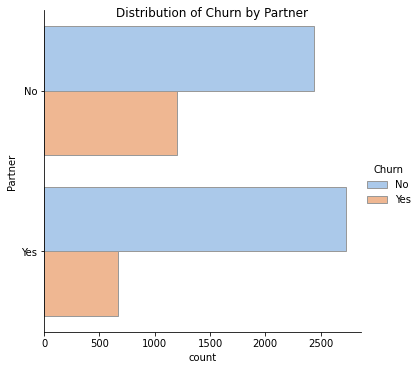

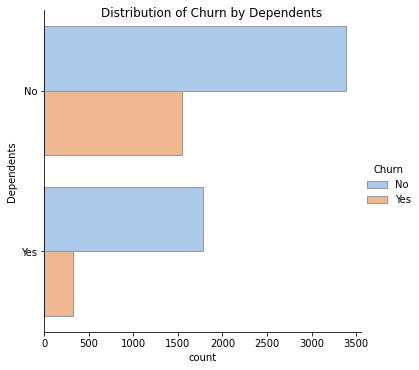

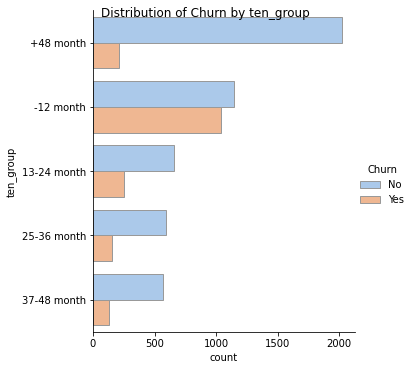

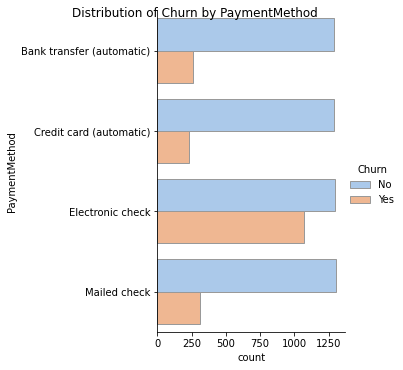

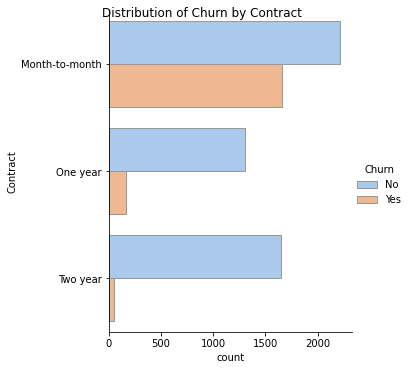

In [ ]:
for col in customerchar:

  """
  This loop creates bivariate graphs (Churn = 'Yes' or 'No') for each customer characteristic

  """
    print(f'\n\nDistribution of Churn by {col}')
    churn_distribution =round(pd.crosstab(index=df[col], columns=df['Churn'], values=df['Churn'], aggfunc=pd.Series.count, margins_name='All', normalize=True), 2)
    colsns=sns.catplot(y=col, hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
    colsns.fig.suptitle(f"Distribution of Churn by {col}")
    display(churn_distribution)



## 1.3-How big is churn compared to the existing customer base

In [138]:
churn_yes=df.Churn=="Yes"
yes=df[churn_yes]
yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-12 month,DSL
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-12 month,Fiber optic
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,-12 month,Fiber optic
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36 month,Fiber optic
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,+48 month,Fiber optic


In [139]:
# Proportion of people that move out

churn_data=np.round(yes.shape[0]/df.shape[0]*100,2)
print(f'Churn customer represent {churn_data}% of in this dataset that means {churn_data}% of customer are churned during the last month')

Churn customer represent 26.54% of in this dataset that means 26.54% of customer are churned during the last month


In [ ]:
yes.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'ten_group',
 'internet service type']

In [141]:

def pivo(x):

  """ This function allow us to do a Pivot Table by customer caracteristics
  the caracteristics is stored in the parameter x.
  """
  
  new_pivot=pd.pivot_table(df, values='customerID', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  return np.round(new_pivot/df.shape[0]*100,2)

In [ ]:
pivo('SeniorCitizen')

SeniorCitizen,No,Yes
Churn,,
No,64.01,9.46
Yes,19.78,6.76


In [144]:
def pivomoney(x):

  """ This function allow us to do a Pivot Table by charges
  the charges is stored in the parameter x"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  return new_pivot

In [145]:
print(f'Distribution in pourcentage of Churn by gender')
display(pivomoney('gender'))

Distribution in pourcentage of Churn by gender


gender,Female,Male
Churn,,
No,157183.85,159801.9
Yes,70248.55,68882.3


In [146]:
def pivototal(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='TotalCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return round(new_pivot/16056168.7*100,2)

In [147]:
def pivomonth(x):

  """ This function allow us to do a Pivot Table by customer charges
  the charges is stored in the parameter x"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'],
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  return round(new_pivot/456116.60*100,2)

In [ ]:
pivomonth('SeniorCitizen')

SeniorCitizen,No,Yes
Churn,,
No,57.93,11.56
Yes,22.08,8.42


In [ ]:
cond = df['Churn']=='Yes'
display(df[cond].head(), df[cond].shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group,internet service type
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-12 month,DSL
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-12 month,Fiber optic
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,-12 month,Fiber optic
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36 month,Fiber optic
13,0280-XJGEX,Male,No,No,No,49,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,+48 month,Fiber optic


(1869, 23)

## 1.4-What services are typically purchased by customers who churned

In [148]:
for col in cosservice:
  print(f'\n\nDistribution in pourcentage of MonthlyCharges by Churned {col}')
  display(pivomonth(col))



Distribution in pourcentage of MonthlyCharges by Churned SeniorCitizen


SeniorCitizen,No,Yes
Churn,,
No,57.93,11.56
Yes,22.08,8.42




Distribution in pourcentage of MonthlyCharges by Churned TechSupport


TechSupport,No,No internet service,Yes
Churn,,,
No,32.52,6.55,30.43
Yes,24.27,0.50,5.73




Distribution in pourcentage of MonthlyCharges by Churned OnlineSecurity


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,33.33,6.55,29.62
Yes,24.72,0.50,5.28




Distribution in pourcentage of MonthlyCharges by Churned OnlineBackup


OnlineBackup,No,No internet service,Yes
Churn,,,
No,28.56,6.55,34.39
Yes,20.14,0.50,9.86




Distribution in pourcentage of MonthlyCharges by Churned DeviceProtection


DeviceProtection,No,No internet service,Yes
Churn,,,
No,28.45,6.55,34.50
Yes,19.46,0.50,10.54




Distribution in pourcentage of MonthlyCharges by Churned PhoneService


PhoneService,No,Yes
Churn,,
No,4.89,64.61
Yes,1.40,29.10




Distribution in pourcentage of MonthlyCharges by Churned MultipleLines


MultipleLines,No,No phone service,Yes
Churn,,,
No,27.77,4.89,36.84
Yes,12.51,1.40,16.60




Distribution in pourcentage of MonthlyCharges by Churned StreamingTV


StreamingTV,No,No internet service,Yes
Churn,,,
No,26.44,6.55,36.51
Yes,13.85,0.50,16.15




Distribution in pourcentage of MonthlyCharges by Churned StreamingMovies


StreamingMovies,No,No internet service,Yes
Churn,,,
No,26.08,6.55,36.87
Yes,13.87,0.50,16.13




Distribution in pourcentage of MonthlyCharges by Churned InternetService


InternetService,No,Yes
Churn,,
No,6.55,62.95
Yes,0.50,30.00


In [ ]:
for col in cosservice:
  print(f'\n\nDistribution in pourcentage of TotalCharges by Churned {col}')
  display(pivototal(col))



Distribution in pourcentage of TotalCharges by Churned SeniorCitizen


SeniorCitizen,No,Yes
Churn,,
No,67.68,14.49
Yes,12.33,5.50




Distribution in pourcentage of TotalCharges by Churned TechSupport


TechSupport,No,No internet service,Yes
Churn,,,
No,32.59,6.18,43.41
Yes,12.60,0.12,5.10




Distribution in pourcentage of TotalCharges by Churned OnlineSecurity


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,33.58,6.18,42.41
Yes,12.95,0.12,4.76




Distribution in pourcentage of TotalCharges by Churned OnlineBackup


OnlineBackup,No,No internet service,Yes
Churn,,,
No,26.39,6.18,49.61
Yes,8.76,0.12,8.95




Distribution in pourcentage of TotalCharges by Churned DeviceProtection


DeviceProtection,No,No internet service,Yes
Churn,,,
No,26.04,6.18,49.95
Yes,8.62,0.12,9.09




Distribution in pourcentage of TotalCharges by Churned PhoneService


PhoneService,No,Yes
Churn,,
No,5.63,76.54
Yes,0.73,17.10




Distribution in pourcentage of TotalCharges by Churned MultipleLines


MultipleLines,No,No phone service,Yes
Churn,,,
No,24.23,5.63,52.32
Yes,4.23,0.73,12.87




Distribution in pourcentage of TotalCharges by Churned StreamingTV


StreamingTV,No,No internet service,Yes
Churn,,,
No,25.10,6.18,50.89
Yes,5.26,0.12,12.45




Distribution in pourcentage of TotalCharges by Churned StreamingMovies


StreamingMovies,No,No internet service,Yes
Churn,,,
No,24.49,6.18,51.51
Yes,5.22,0.12,12.48




Distribution in pourcentage of TotalCharges by Churned InternetService


InternetService,No,Yes
Churn,,
No,6.18,75.99
Yes,0.12,17.71


In [ ]:
def test(col, data = df):
  tb = pd.crosstab(df[col], df["Churn"], normalize=False)
  chi2, pval = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
def test(col, data = df):
  tb = pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'],
                    columns=col,
                    aggfunc='sum')
  chi2, pval = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")

In [ ]:
test('OnlineBackup')

ValueError: ignored

## 1.5-Are any services especially helpful in retaining customers